In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the cleaned dataset 

In [2]:
cleaned_data = pd.read_csv('cleaned_data.csv')
cleaned_data

,age,gender,country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,26,Male,United Kingdom,No,No,Yes,Never,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1247,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1248,34,Male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1249,46,Female,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


### Demographic Analysis - Univariate analysis

#### Age Distribution of respondents

In [3]:
cleaned_data['age'].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: age, dtype: float64

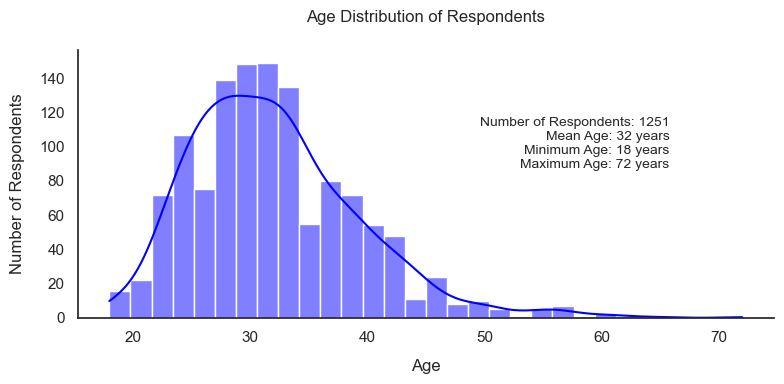

In [9]:
sns.set(style = 'white', palette = 'muted')
plt.figure(figsize=(8, 4))
sns.histplot(data = cleaned_data, x = 'age', kde = True, color = 'blue', bins = 30, line_kws = {'linewidth': 1.5}, alpha = 0.5)

plt.xlabel('Age', labelpad = 10, fontsize = 12)
plt.ylabel('Number of Respondents', labelpad = 10, fontsize = 12)
plt.title('Age Distribution of Respondents', pad = 20, fontsize = 12)
sns.despine()

summary_stats = """Number of Respondents: 1251
Mean Age: 32 years
Minimum Age: 18 years
Maximum Age: 72 years"""
plt.text(s = summary_stats, x = 0.85, y = 0.75, ha = 'right', va = 'top', transform = plt.gca().transAxes, fontsize = 10)

plt.tight_layout()
plt.show()

#### Gender Distribution of respondents

In [10]:
cleaned_data['gender'].value_counts()

gender
Male      986
Female    247
Other      18
Name: count, dtype: int64

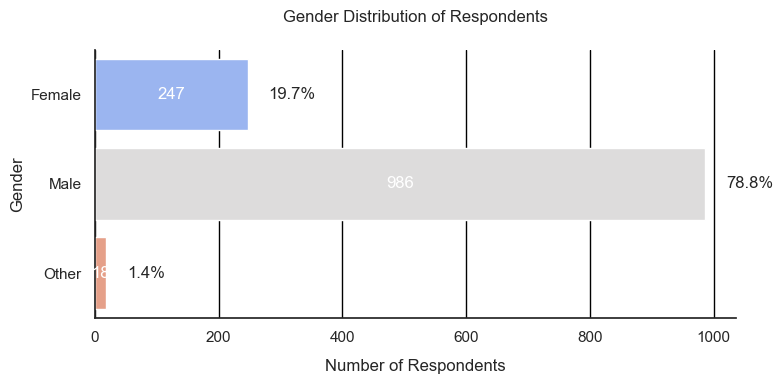

In [11]:
plt.figure(figsize = (8, 4))

gp = sns.countplot(y = 'gender', data = cleaned_data, palette = 'coolwarm')

plt.title('Gender Distribution of Respondents', pad = 20)
plt.xlabel('Number of Respondents', labelpad = 10)
plt.ylabel('Gender')  
plt.grid(axis = 'x', linestyle = '-', linewidth = 1, color='black')  
sns.despine()

total = len(cleaned_data['gender'])
for bar in gp.patches:
    count = int(bar.get_width())  
    percentage = '{:.1f}%'.format(100 * bar.get_width() / total)  

    plt.annotate(count, (bar.get_width() / 2, bar.get_y() + bar.get_height() / 2),
                 ha = 'center', va = 'center', color = 'white')

    plt.annotate(percentage, (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                 xytext = (15, 0), textcoords = 'offset points', ha = 'left', va = 'center')

plt.tight_layout()  
plt.show()

#### Country Distribution of respondents

In [8]:
cleaned_data['country'].value_counts()

country
United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Cz

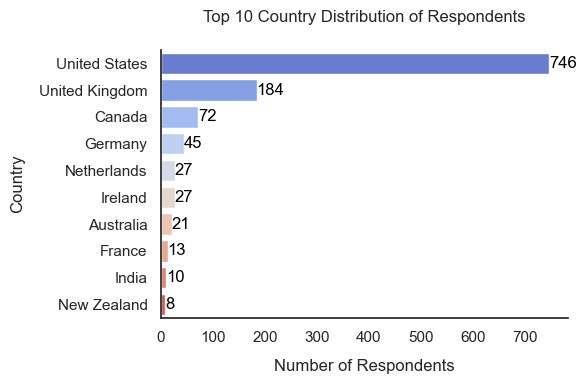

In [16]:
country_counts = cleaned_data['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

plt.figure(figsize=(6, 4))
sns.barplot(x = 'count', y = 'country', data = country_counts.head(10), palette = 'coolwarm')
plt.title('Top 10 Country Distribution of Respondents', fontsize = 12, pad = 20)
plt.xlabel('Number of Respondents', fontsize = 12, labelpad = 10)
plt.ylabel('Country', fontsize = 12, labelpad = 10)
sns.despine()

for index, row in country_counts.head(10).iterrows():
    plt.text(row['count'], index, f"{row['count']}", color = 'black', ha = 'left', va = 'center')

plt.tight_layout()
plt.show()

#### Remote work Distribution of respondents

In [10]:
cleaned_data['remote_work'].value_counts()

remote_work
No     880
Yes    371
Name: count, dtype: int64

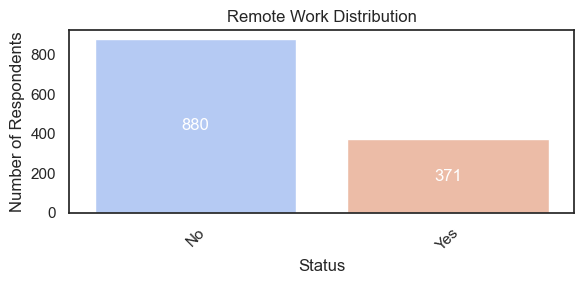

In [15]:
# Remote Work Distribution 
remote_work = cleaned_data['remote_work'].value_counts()

plt.figure(figsize = (6, 3))
sns.barplot(x = remote_work.index, y = remote_work.values, palette = "coolwarm")
plt.title('Remote Work Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation = 45) 

for index, value in enumerate(remote_work.values):
     plt.text(index, value/2, str(value), color='white', ha='center', va='center')

plt.tight_layout()
plt.show()

#### Self employed Distribution of respondents

In [12]:
cleaned_data['self_employed'].value_counts()

self_employed
No     1109
Yes     142
Name: count, dtype: int64

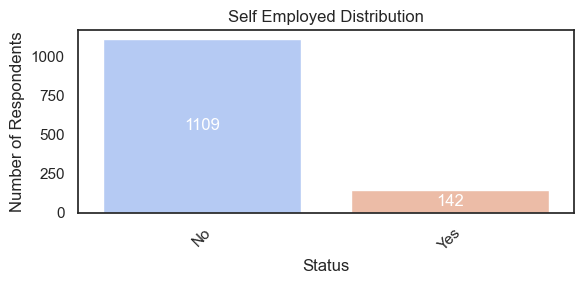

In [14]:
# Self Employed Distribution 
self_employed = cleaned_data['self_employed'].value_counts()

plt.figure(figsize = (6, 3))
sns.barplot(x = self_employed.index, y = self_employed.values, palette = "coolwarm")
plt.title('Self Employed Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Respondents')
plt.xticks(rotation = 45) 

for index, value in enumerate(self_employed.values):
     plt.text(index, value/2, str(value), color = 'white', ha = 'center', va = 'center')

plt.tight_layout()
plt.show()